In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
from dtoolbioimage import ImageDataSet, Image3D, Image
import numpy as np

In [3]:
imageds = ImageDataSet('azure://jicimagedatasets/cc9d757a-b149-4626-83be-abc5a3765cb8')

In [4]:
wall_stack = imageds.get_stack('fca-3_FLC-Venus_root01', 'fca-3_FLC-Venus_root01 #1', 1)

In [113]:
venus_stack = imageds.get_stack('fca-3_FLC-Venus_root01', 'fca-3_FLC-Venus_root01 #1', 0)

In [22]:
from dtoolbioimage.segment import sitk_watershed_segmentation, filter_segmentation_by_size

In [8]:
from dtoolbioimage import zoom_to_match_scales
zoomed_stack = zoom_to_match_scales(wall_stack)

In [28]:
zoomed_stack

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [20]:
raw_segmentation = sitk_watershed_segmentation(zoomed_stack)

In [21]:
raw_segmentation.view(Image3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [26]:
filtered = filter_segmentation_by_size(raw_segmentation)

In [27]:
filtered.view(Image3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [29]:
from dtoolbioimage.segment import Segmentation3D

In [32]:
uci = filtered.view(Segmentation3D).unique_color_image

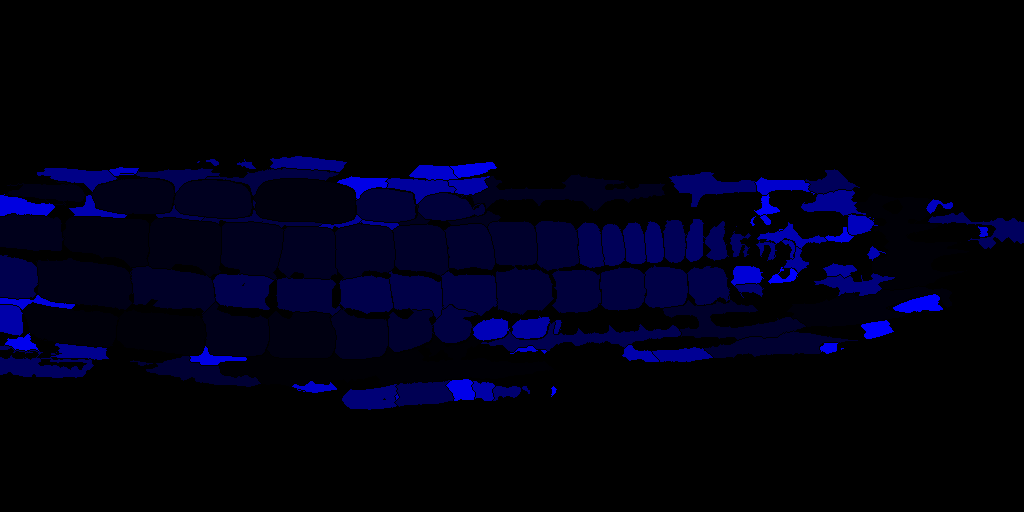

In [35]:
uci[:,:,10].view(Image)

In [37]:
filtered.view(Segmentation3D).save('root01segmentation.tif')

In [38]:
import os; os.getcwd()

'/Users/mhartley/projects/dtoolbioimage/examples'

In [39]:
pretty = filtered.view(Segmentation3D).pretty_color_image

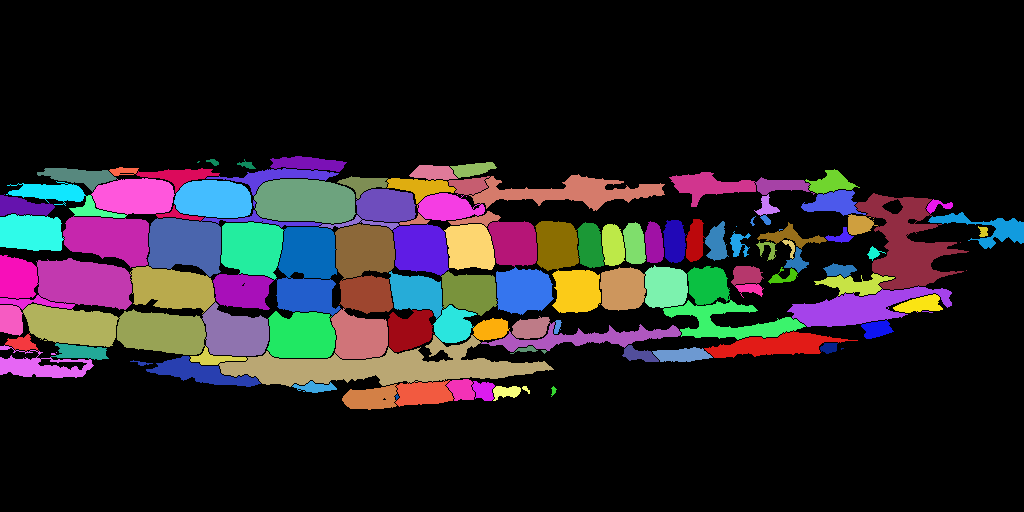

In [41]:
pretty[:,:,10].view(Image)

In [46]:
from dtoolbioimage.util.array import pretty_color_array
from ipywidgets import interactive, IntSlider, Output, HBox
from IPython.display import clear_output, display, display_png

def simple_segmentation_viewer(stack):

    _, _, max_z = stack.shape

    slider = IntSlider(min=0, max=max_z, step=1, description='Z plane:')

    def show_z_plane(z):
        display_png(pretty_color_array(stack[:,:,z]).view(Image))
    
    return interactive(show_z_plane, z=slider)


In [47]:
simple_segmentation_viewer(filtered)

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [51]:
from io import BytesIO
from imageio import imsave

In [54]:
png_byte_arrays = []
for z in range(filtered.shape[2]):
    b = BytesIO()
    imsave(b, pretty_color_array(filtered[:,:,z]), 'PNG', compress_level=0)
    png_byte_arrays.append(b)

In [57]:
class CachedImageView(object):
    
    def _repr_png_(self):
        return png_byte_arrays[0].getvalue()

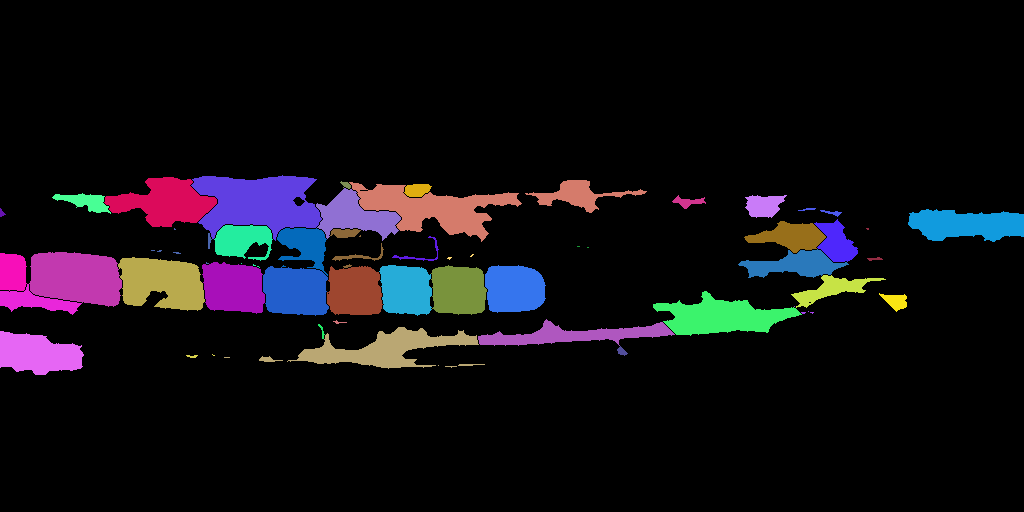

In [58]:
CachedImageView()

In [76]:
from dtoolbioimage.util.array import pretty_color_array
from ipywidgets import interactive, IntSlider, Output, HBox
from IPython.display import clear_output, display, display_png

def cached_segmentation_viewer(stack):

    _, _, max_z = stack.shape
    
    slider = IntSlider(min=0, max=max_z, step=1, description='Z plane:')

    png_byte_arrays = {}
    def show_z_plane(z):
        if z in png_byte_arrays:
            raw_png_rep = png_byte_arrays[z]
        else:
            b = BytesIO()
            imsave(b, pretty_color_array(stack[:,:,z]), 'PNG', compress_level=0)
            raw_png_rep = b.getvalue()
            png_byte_arrays[z] = raw_png_rep

        display({'image/png': raw_png_rep}, raw=True)
    
    return interactive(show_z_plane, z=slider)

In [77]:
cached_segmentation_viewer(filtered)

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [80]:
filtered[np.where(filtered > 50)] = 0

In [81]:
filtered.view(Segmentation3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [83]:
fpath = 'root01segmentation.tif'

In [84]:
from imageio import volread

In [85]:
unique_color_image = volread(fpath)

In [86]:
unique_color_image.shape

(36, 512, 1024, 3)

In [87]:
print(unique_color_image[18,256,512])

[ 0  0 26]


In [88]:
unique_color = unique_color_image[18,256,512]

In [90]:
from dtoolbioimage.util.color import identifier_from_unique_color

In [91]:
identifier_from_unique_color(unique_color)

26

In [93]:
planes = []
for z in range(unique_color_image.shape[0]):
    pass

In [101]:
zdim, xdim, ydim, _ = unique_color_image.shape
planes = []
for z in range(zdim):
    segmentation = np.zeros((xdim, ydim), dtype=np.uint32)
    segmentation += unique_color_image[z,:,:,2]
    segmentation += unique_color_image[z,:,:,1] * 256
    segmentation += unique_color_image[z,:,:,0] * 256 * 256
    planes.append(segmentation)

In [103]:
np.dstack(planes).view(Segmentation3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [110]:
Segmentation3D.from_file('root01segmentation.tif')

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [106]:
fpath = 'root01segmentation.tif'

In [108]:
unique_color_image = volread(fpath)

In [109]:
unique_color_image.shape

(36, 512, 1024, 3)

In [111]:
from skimage.measure import regionprops

ModuleNotFoundError: No module named 'skimage'

In [112]:
filtered.view(Segmentation3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [115]:
zoomed_venus_stack = zoom_to_match_scales(venus_stack)

In [116]:
zoomed_venus_stack

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [117]:
from skimage.measure import regionprops

/Users/mhartley/projects/dtoolbioimage/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [128]:
by_label = {r.label: r for r in regionprops(filtered)}

In [122]:
by_label[5].bbox

(308, 113, 1, 365, 228, 36)

In [123]:
rmin, cmin, zmin, rmax, cmax, zmax = by_label[5].bbox

In [124]:
selected = filtered[rmin:rmax, cmin:cmax, zmin:zmax]

In [127]:
selected.view(Segmentation3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=34), Output()), _dom_classes=('widget-int…

In [129]:
region = selected == 5

In [133]:
from scipy.ndimage.morphology import binary_erosion

In [134]:
eroded = binary_erosion(region)

In [135]:
eroded.view(Image3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=35), Output()), _dom_classes=('widget-int…

In [137]:
surface = region ^ eroded

In [138]:
surface.view(Image3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=35), Output()), _dom_classes=('widget-int…

In [140]:
np.sum(surface)

13344

In [141]:
np.sum(region)

117614

In [190]:
def spherality(region):
    eroded = binary_erosion(region)
    surface = region ^ eroded
    
    S = np.sum(surface)
    V = np.sum(region)
    
    mult = 4.5 * np.sqrt(np.pi)
    
    return mult * V / np.power(S, 1.5)
    

In [191]:
spherality(region)

0.6085796422460269

In [144]:
np.power(2, 1.5)

2.8284271247461903

In [156]:
from skimage.morphology import ball

In [158]:
ball(20).view(Image3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=41), Output()), _dom_classes=('widget-int…

In [160]:
spherality(ball == 1)

/Users/mhartley/projects/dtoolbioimage/venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


nan

In [163]:
ballbool = ball(100) == 1

In [164]:
ballbool.view(Image3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=201), Output()), _dom_classes=('widget-in…

In [165]:
eroded = binary_erosion(ballbool)

In [166]:
surface = ballbool ^ eroded

In [167]:
surface.view(Image3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=201), Output()), _dom_classes=('widget-in…

In [192]:
spherality(ballbool)

0.9997642587059835

In [171]:
ballbool.shape

(201, 201, 201)

In [175]:
(4 / 3) * np.pi * np.power(100, 3)

4188790.2047863905

In [173]:
np.sum(ballbool)

4187857

In [176]:
np.sum(surface)

103734

In [178]:
4 * np.pi * 100 * 100

125663.70614359173

In [186]:
V = (4 / 3) * np.pi * np.power(100, 3)
S = 4 * np.pi * 100 * 100
mult = 6 * np.sqrt(np.pi)
mult * V / np.power(S, 1.5)

1.0

In [193]:
from dtoolbioimage.segment import select_region, spherality

In [201]:
r = select_region(filtered, 50)

In [202]:
r.view(Image3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=28), Output()), _dom_classes=('widget-int…

In [203]:
wonky = select_region(filtered, 50)

In [204]:
good = select_region(filtered, 8)

In [206]:
spherality(good)

0.6279617751706332

In [207]:
spherality(wonky)

0.2224782198479228

In [208]:
print(np.unique(filtered))

[ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50]


In [212]:
bad = [l for l in range(3, 51) if spherality(select_region(filtered, l)) < 0.5]

In [213]:
bad

[3, 4, 7, 17, 23, 25, 29, 30, 40, 44, 45, 47, 50]

In [214]:
select_region(filtered, 3).view(Image3D)

interactive(children=(IntSlider(value=0, description='Z plane:', max=36), Output()), _dom_classes=('widget-int…

In [215]:
for l in bad:
    filtered[np.where(filtered == l)] = 0

In [ ]:
filtered.view(Segmentation3D)